In [9]:
# Credit Card Fraud Detection - Unsupervised Anomaly Detection
# Dataset: creditcard.csv

# -------------------------
# 1. Import libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [10]:
# 2. Load dataset
# -------------------------
df = pd.read_csv("creditcard.csv")
print("Shape of dataset:", df.shape)
print(df.head())

Shape of dataset: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

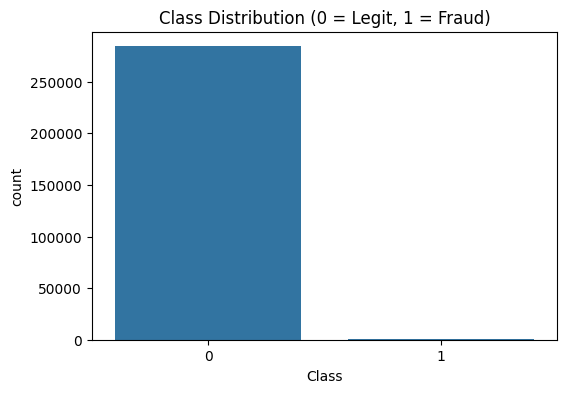

In [11]:
# 3. Explore dataset
# -------------------------
print(df.info())
print(df['Class'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

In [12]:
# 4. Feature scaling
# -------------------------
# 'Amount' and 'Time' need scaling
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop old columns
df = df.drop(['Time','Amount'], axis=1)

In [13]:
# 5. Prepare data
# -------------------------
X = df.drop("Class", axis=1)
y = df["Class"]

In [15]:
#6. Isolation Forest
# -------------------------
iso = IsolationForest(
    n_estimators=200,
    max_samples="auto",
    contamination=0.0017,  # approx fraud ratio
    random_state=42,
    n_jobs=-1
)
y_pred_iso = iso.fit_predict(X)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]

print("\nIsolation Forest Results")
print(confusion_matrix(y, y_pred_iso))
print(classification_report(y, y_pred_iso))
print("ROC-AUC:", roc_auc_score(y, y_pred_iso))


Isolation Forest Results
[[283955    360]
 [   367    125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807

ROC-AUC: 0.6263994197149646


In [16]:
# 7. Local Outlier Factor
# -------------------------
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.0017,
    novelty=False
)
y_pred_lof = lof.fit_predict(X)
y_pred_lof = [1 if p == -1 else 0 for p in y_pred_lof]

print("\nLocal Outlier Factor Results")
print(confusion_matrix(y, y_pred_lof))
print(classification_report(y, y_pred_lof))
print("ROC-AUC:", roc_auc_score(y, y_pred_lof))


Local Outlier Factor Results
[[283830    485]
 [   492      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

ROC-AUC: 0.49914707278898407


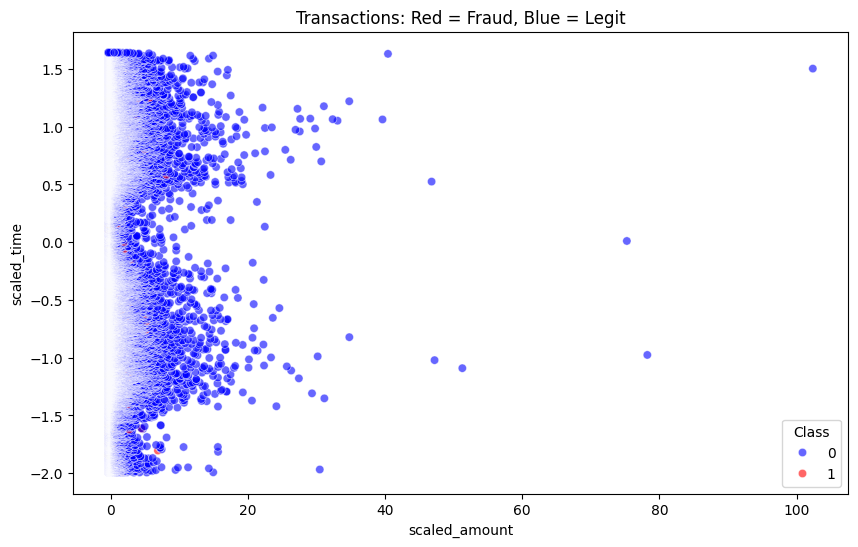

In [17]:
# -------------------------
# 8. Visualize anomalies
# -------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(x="scaled_amount", y="scaled_time", hue=y, palette={0:"blue",1:"red"}, alpha=0.6, data=df)
plt.title("Transactions: Red = Fraud, Blue = Legit")
plt.show()
